In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molbloom
import sqlite3
import pandas as pd
from tqdm import tqdm
from rdkit import Chem
from IPython.display import display

In [3]:
from aizynthfinder.aizynthfinder import AiZynthFinder

finder = AiZynthFinder("config/config.yml")

In [4]:
finder.stock.selection = 'zinc'
finder.config.expansion_policy.selection = 'uspto'
finder.config.filter_policy.selection = 'uspto'

In [11]:
finder.config.search.iteration_limit = 500
finder.config.search.max_transforms = 6
finder.config.search.return_first = True

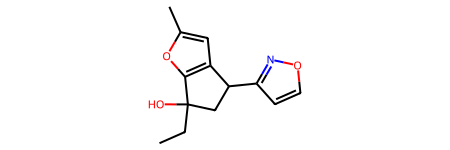

14.33545207977295

In [15]:
smi = 'CC1CC(O)C2=C(CC3CCC3)N=NN12'
smi = 'CC(CO)NC1=NSC=C1C1(C)OCC(C)O1'
smi = 'CCC1(O)CC(C2=NOC=C2)C2=C1OC(C)=C2'
display(Chem.MolFromSmiles(smi))

finder.target_smiles = smi
finder.prepare_tree()
finder.tree_search(show_progress=True)

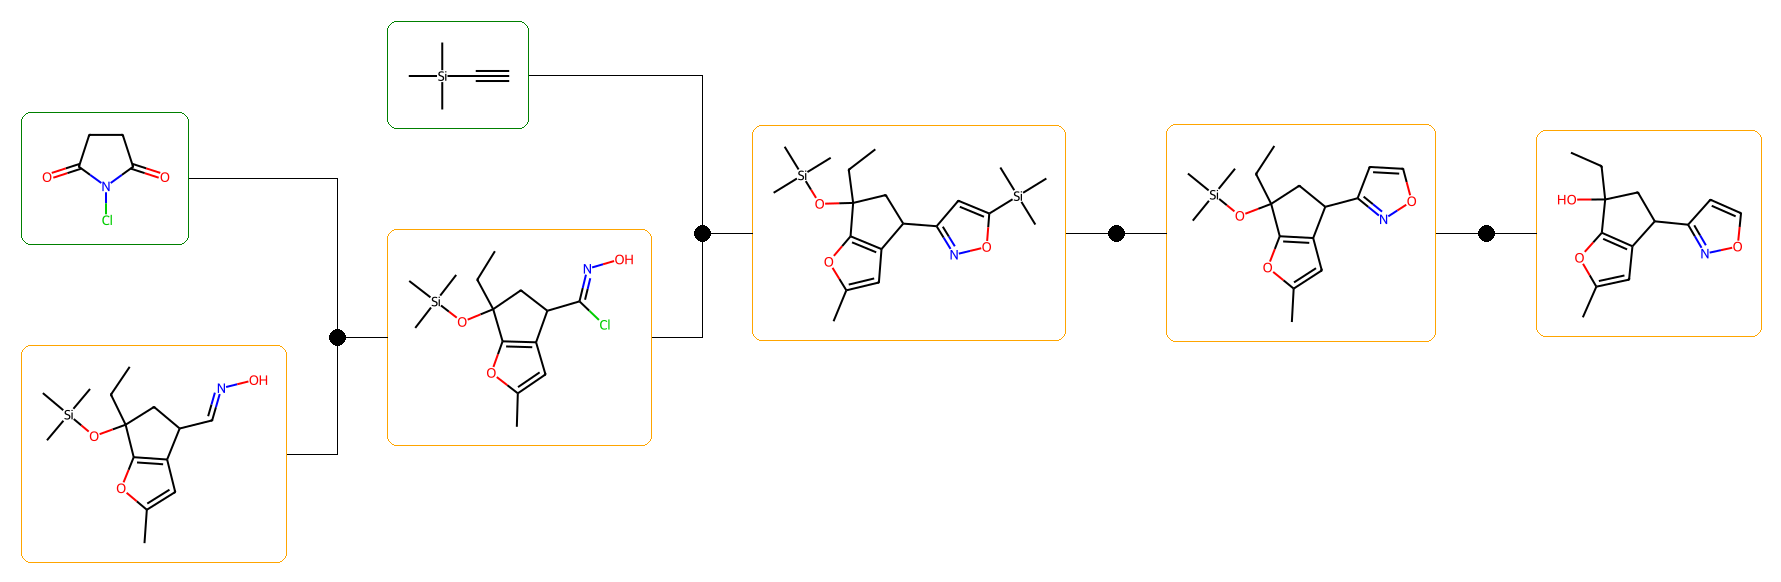

In [16]:
rewards = finder.config.search.algorithm_config["search_rewards"] 
finder.build_routes(scorer=rewards)
finder.routes[0]['reaction_tree'].to_image()